In [3]:
pip install Gensim==3.8.3
# Установка Gensim весрия 3.8.3

Note: you may need to restart the kernel to use updated packages.


In [4]:
# Добавления библиотек используемых в итоговом проекте
import pandas as pd
import numpy as np
import seaborn as sns
import gensim 
import random
from tqdm import tqdm
from gensim.models import Word2Vec 

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

import warnings;
warnings.filterwarnings('ignore')

In [5]:
# Просмотр данных 
df=pd.read_csv("C:/Users/Матвей/Downloads/farm.csv")
df.head()

,sale_date_date,contact_id,shop_id,product_id,name,product_sub_category_id,product_category_id,brand_id,quantity
0,2018-12-07,1260627,1455.0,168308.0,(197312) Пакет-майка 25см х 45см,906.0,205.0,-1.0,"1,00"
1,2018-12-07,198287,279.0,134832.0,(62448) Перекись водорода р-р наружн. 3% фл.по...,404.0,93.0,-1.0,"1,00"
2,2018-12-07,2418385,848.0,101384.0,(72183) Салициловая кислота р-р спирт 2% фл 40...,404.0,93.0,-1.0,"1,00"
3,2018-12-07,1285774,1511.0,168570.0,(197309) Пакет 28см х 50см,906.0,205.0,-1.0,"1,00"
4,2018-12-07,1810323,1501.0,168319.0,(197310) Пакет 30см х 60см,906.0,205.0,-1.0,"1,00"


In [6]:
# Просмотр типов данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000003 entries, 0 to 20000002
Data columns (total 9 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   sale_date_date           object 
 1   contact_id               object 
 2   shop_id                  float64
 3   product_id               float64
 4   name                     object 
 5   product_sub_category_id  float64
 6   product_category_id      float64
 7   brand_id                 float64
 8   quantity                 object 
dtypes: float64(5), object(4)
memory usage: 1.3+ GB


In [7]:
# Удаления строк и столбцов с нулевыми значениями NULL / NAN
df=df.dropna()

In [9]:
df ['product_id']= df['product_id'].astype(int)

In [11]:
df ['shop_id']= df['shop_id'].astype(int)

In [12]:
df

,sale_date_date,contact_id,shop_id,product_id,name,product_sub_category_id,product_category_id,brand_id,quantity
0,2018-12-07,1260627,1455,168308,(197312) Пакет-майка 25см х 45см,906.0,205.0,-1.0,"1,00"
1,2018-12-07,198287,279,134832,(62448) Перекись водорода р-р наружн. 3% фл.по...,404.0,93.0,-1.0,"1,00"
2,2018-12-07,2418385,848,101384,(72183) Салициловая кислота р-р спирт 2% фл 40...,404.0,93.0,-1.0,"1,00"
3,2018-12-07,1285774,1511,168570,(197309) Пакет 28см х 50см,906.0,205.0,-1.0,"1,00"
4,2018-12-07,1810323,1501,168319,(197310) Пакет 30см х 60см,906.0,205.0,-1.0,"1,00"
...,...,...,...,...,...,...,...,...,...
19999995,2018-06-13,1601618,1499,66842,(111992) Кэа Хэлс Ромашка [цветки фильтр-пакет...,615.0,140.0,1838.0,"1,00"
19999996,2018-06-13,1394104,1495,136795,(97857) Лориста Н таб. п.о. 50мг+12.5мг №90,738.0,170.0,-1.0,"1,00"
19999997,2018-06-13,1570654,1516,119513,(25299) Локрен тб п/о 20мг N28,738.0,170.0,-1.0,"1,00"
19999998,2018-06-13,1924036,1485,71723,(60907) Тералиджен табл. п.п.о. 5 мг №25,637.0,146.0,-1.0,"1,00"


In [13]:
# Изменение типа стоблца
df ['contact_id']= df['contact_id'].astype(int)

In [14]:
# Уникальные значения столбца
len(df['brand_id'].unique())

1631

In [15]:
df.shape

(19989262, 9)

In [16]:
df.dtypes

sale_date_date              object
contact_id                   int32
shop_id                      int32
product_id                   int32
name                        object
product_sub_category_id    float64
product_category_id        float64
brand_id                   float64
quantity                    object
dtype: object

In [17]:
df ['product_id'] = df ['product_id']. astype (str)

In [18]:
# отбор числовых колонок
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

['contact_id' 'shop_id' 'product_sub_category_id' 'product_category_id'
 'brand_id']


In [19]:
# отбор нечисловых колонок
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

['sale_date_date' 'product_id' 'name' 'quantity']


<AxesSubplot:>

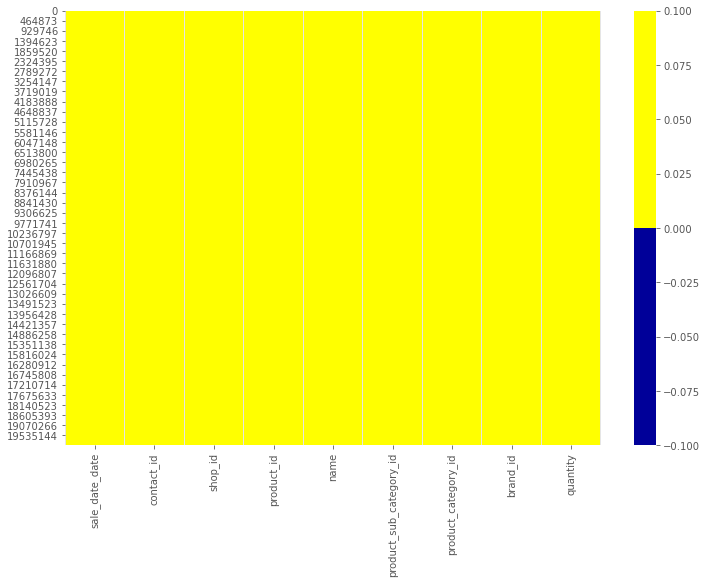

In [20]:
# Проверка на пропуск данных
cols = df.columns[:30] # первые 30 колонок
# определяем цвета 
# желтый - пропущенные данные, синий - не пропущенные
colours = ['#000099', '#ffff00'] 
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

In [21]:
# Расчет основных показателей: среднее значение, стандартное отклонение и тд.
df['brand_id'].describe()

count    1.998926e+07
mean     4.072123e+02
std      9.930664e+02
min     -1.000000e+00
25%     -1.000000e+00
50%     -1.000000e+00
75%     -1.000000e+00
max      5.475000e+03
Name: brand_id, dtype: float64

In [22]:
# Удаление стоблца.
del df['brand_id']

In [23]:
df

,sale_date_date,contact_id,shop_id,product_id,name,product_sub_category_id,product_category_id,quantity
0,2018-12-07,1260627,1455,168308,(197312) Пакет-майка 25см х 45см,906.0,205.0,"1,00"
1,2018-12-07,198287,279,134832,(62448) Перекись водорода р-р наружн. 3% фл.по...,404.0,93.0,"1,00"
2,2018-12-07,2418385,848,101384,(72183) Салициловая кислота р-р спирт 2% фл 40...,404.0,93.0,"1,00"
3,2018-12-07,1285774,1511,168570,(197309) Пакет 28см х 50см,906.0,205.0,"1,00"
4,2018-12-07,1810323,1501,168319,(197310) Пакет 30см х 60см,906.0,205.0,"1,00"
...,...,...,...,...,...,...,...,...
19999995,2018-06-13,1601618,1499,66842,(111992) Кэа Хэлс Ромашка [цветки фильтр-пакет...,615.0,140.0,"1,00"
19999996,2018-06-13,1394104,1495,136795,(97857) Лориста Н таб. п.о. 50мг+12.5мг №90,738.0,170.0,"1,00"
19999997,2018-06-13,1570654,1516,119513,(25299) Локрен тб п/о 20мг N28,738.0,170.0,"1,00"
19999998,2018-06-13,1924036,1485,71723,(60907) Тералиджен табл. п.п.о. 5 мг №25,637.0,146.0,"1,00"


#### Уникальные клиенты

In [24]:
customers = df ["contact_id"]. unique (). tolist ()
len (customers)

1642125

#### Выделим небольшую часть набора данных, 90% клиентов для создания вложений word2vec. Разделим данные.

In [25]:
# перемешиваем идентификаторы клиентов
random.shuffle(customers)

# извлекаем 90% идентификаторов клиентов
customers_train = [customers[i] for i in range(round(0.9*len(customers)))]

# разделим данные на выборки для обучения и проверки
train_df = df[df['contact_id'].isin(customers_train)]
validation_df = df[~df['contact_id'].isin(customers_train)]

#### Cоздадим последовательности покупок, сделанных клиентами, в наборе данных.

In [26]:
# Создаем список клентов
purchases_train = []

#Заполняем его кодами покупок
for i in tqdm(customers_train):
    temp = train_df[train_df["contact_id"] == i]["product_id"].tolist()
    purchases_train.append(temp)

100%|██████████████████████████████████████████████████████████████████████| 1477912/1477912 [6:37:39<00:00, 61.94it/s]


In [27]:
# Создаем список клентов
purchases_val = []

#Заполняем его кодами покупок
for i in tqdm(validation_df['contact_id'].unique()):
    temp = validation_df[validation_df["contact_id"] == i]["product_id"].tolist()
    purchases_val.append(temp)

100%|█████████████████████████████████████████████████████████████████████████| 164213/164213 [07:28<00:00, 366.06it/s]


#### Создание вложений word2vec для продуктов

In [28]:
# Обучаем нашу модель Word2Vec

model = Word2Vec(window = 10, sg = 1, hs = 0,
                 negative = 10, 
                 alpha=0.03, min_alpha=0.0007,
                 seed = 14)

model.build_vocab(purchases_train, progress_per=200)

model.train(purchases_train, total_examples = model.corpus_count, 
            epochs=10, report_delay=1)

(177003431, 179950720)

In [29]:
# Поскольку мы не планируем дальше обучать модель, мы вызываем здесь init_sims () . Это сделает модель намного более эффективной с точки зрения памяти
model.init_sims(replace=True)

In [30]:
# Уточняем кол-во уникальных слов
print(model)

Word2Vec(vocab=22218, size=100, alpha=0.03)


#### Наша модель имеет словарь из 6022 уникального слова и их векторов размером 100 каждый. Затем мы извлечем векторы всех слов в нашем словаре и сохраним их в одном месте для легкого доступа.

In [31]:
# Извлекаем кол-во векторов
X = model[model.wv.vocab]

X.shape

(22218, 100)

In [33]:
# установка umap-learn
pip install umap-learn

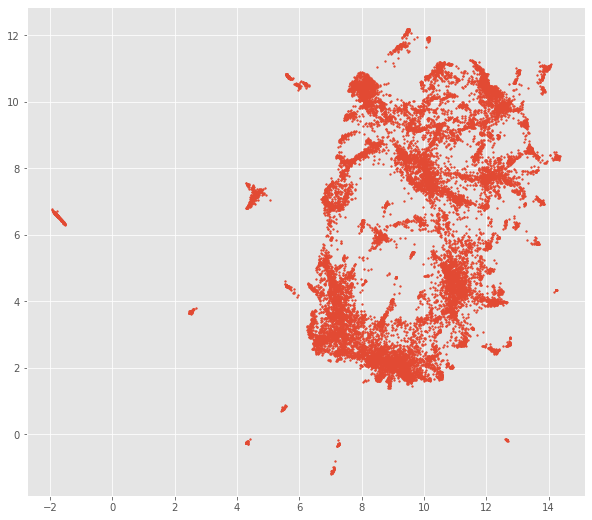

In [34]:
# Уменьшаем размер векторов со 100 до 2, используя алгоритм UMAP и визуализируем
import umap

cluster_embedding = umap.UMAP(n_neighbors=30, min_dist=0.0,
                              n_components=2, random_state=42).fit_transform(X)

plt.figure(figsize=(10,9))
plt.scatter(cluster_embedding[:, 0], cluster_embedding[:, 1], s=3, cmap='Spectral')

In [35]:
products = train_df[["product_id", "name"]]

# Удаляем дубликаты
products.drop_duplicates(inplace=True, subset='product_id', keep="last")

# создаем словарь продуктов
products_dict = products.groupby('product_id')['name'].apply(list).to_dict()

#### Проверка словаря

In [44]:
products_dict ['134832']

['(62448) Перекись водорода р-р наружн. 3% фл.полимерн. 100мл']

In [45]:
# Выводим 6 схожих товаров
def similar_products(v, n = 6):
    
    ms = model.similar_by_vector(v, topn= n+1)[1:]
    
    new_ms = []
    for j in ms:
        pair = (products_dict[j[0]][0], j[1])
        new_ms.append(pair)
        
    return new_ms  

In [46]:
#Проверка
similar_products(model['134832'])

[('(12716) Перекись водорода р-р наружн. 3% фл.полимерн. 100мл',
  0.9045730829238892),
 ('(67954) Йода р-р спирт 5% фл 10мл N1 с крышкой-помазком Renewal',
  0.8358113765716553),
 ('(39407) Йода р-р спирт 5% фл 10мл N1', 0.8343015313148499),
 ('(114892) Нью Лайф Бинт марл мед стер 5м х 10см уп N1/СТМ',
  0.8314892649650574),
 ('(24768) Йода р-р спирт 5% фл 10мл N1', 0.8145346641540527),
 ('(10283) Бриллиантовый зеленый р-р спирт 1% фл 10мл N1 с винтовой крышкой',
  0.8065400123596191)]

#### Результаты довольно актуальны и хорошо соответствуют исходному продукту. Однако этот вывод основан на векторе только одного продукта. Возьмем среднее значение всех векторов продуктов

In [47]:
def aggregate_vectors(products):
    product_vec = []
    for i in products:
        try:
            product_vec.append(model[i])
        except KeyError:
            continue
        
    return np.mean(product_vec, axis=0)

In [48]:
# Изпользуем проверочные данные
len(purchases_val[0])

8

In [49]:
#Проверяем работу функции
aggregate_vectors(purchases_val[0]).shape

(100,)

In [57]:
# Находим похожие товары
similar_products(aggregate_vectors(purchases_val[0]))

[('(111747) Рибоксин Авексима тб 200мг N50', 0.7695198059082031),
 ('(103365) Аспаркам таб.№56 Renewal', 0.7635525465011597),
 ('(40583) Милдронат капс 250мг N40', 0.7612074613571167),
 ('(56791) Милдронат капс 500мг №60', 0.7290228009223938),
 ('(180739) Омепразол-Акрихин капс.кишечнораст.20мг №30', 0.7213425636291504),
 ('(118115) Предуктал ОД капс.пролонг.действия 80мг №30', 0.7078867554664612)]